<a href="https://colab.research.google.com/github/kathuman/Python-Experiments/blob/main/220215_financial_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/a-comprehensive-guide-to-downloading-stock-prices-in-python-2cd93ff821d4

In [1]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
from sklearn.preprocessing import StandardScaler
from math import sqrt
import numpy as np

     |████████████████████████████████| 6.4 MB 7.0 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=a4501762dade0bb6952592c812dd98e877a638140a71f5688b8f6d1637524ce8
  Stored in directory: /root/.cache/pip/wheels/4b

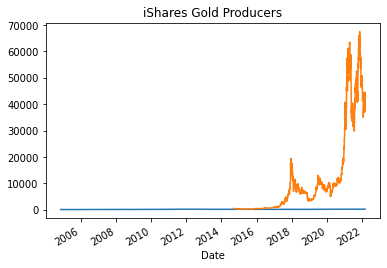

In [ ]:
gldTicker = yf.Ticker('GLD')
ishareTicker = yf.Ticker('BTC-USD')
tesla = yf.Ticker('TSLA')

gld_df = gldTicker.history(period="max")
ish_df = ishareTicker.history(period="max")

gld_df['Close'].plot(title="SPDR Gold Shares")
ish_df['Close'].plot(title="iShares Gold Producers")

check: https://github.com/ranaroussi/yfinance

In [ ]:
tesla.balance_sheetr

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Intangible Assets,2.570000e+08,3.130000e+08,3.390000e+08,2.820000e+08
Capital Surplus,2.980300e+10,2.726000e+10,1.273600e+10,1.024900e+10
Total Liab,3.054800e+10,2.846900e+10,2.619900e+10,2.342700e+10
Total Stockholder Equity,3.018900e+10,2.222500e+10,6.618000e+09,4.923000e+09
Minority Interest,1.394000e+09,1.454000e+09,1.492000e+09,1.390000e+09
Other Current Liab,4.756000e+09,4.147000e+09,3.693000e+09,2.955000e+09
Total Assets,6.213100e+10,5.214800e+10,3.430900e+10,2.974000e+10
Common Stock,1.000000e+06,1.000000e+06,1.000000e+06,NaN
Other Current Assets,3.450000e+08,2.380000e+08,2.460000e+08,1.930000e+08
Retained Earnings,3.310000e+08,-5.399000e+09,-6.083000e+09,-5.318000e+09


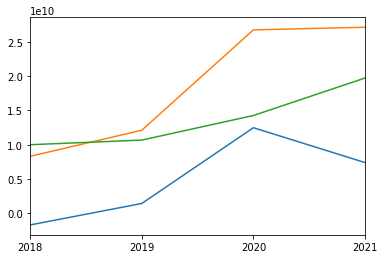

In [ ]:
(tesla.balance_sheet.loc['Total Current Assets']-tesla.balance_sheet.loc['Total Current Liabilities']).plot()
tesla.balance_sheet.loc['Total Current Assets'].plot()
tesla.balance_sheet.loc['Total Current Liabilities'].plot()

we will now attempt a standardizaton of these values

In [ ]:
# prepare data for standardization
values1 = gld_df['Close'].values
values1 = values1.reshape((len(values1), 1))

values2 = ish_df['Close'].values
values2 = values2.reshape((len(values2), 1))

# train the standardization
scaler1 = StandardScaler()
scaler1 = scaler1.fit(values1)
print('Mean: %f, StandardDeviation: %f' % (scaler1.mean_, sqrt(scaler1.var_)))

scaler2 = StandardScaler()
scaler2 = scaler2.fit(values2)
print('Mean: %f, StandardDeviation: %f' % (scaler2.mean_, sqrt(scaler2.var_)))


# standardization the dataset and print the first 5 rows
normalized1 = scaler1.transform(values1)
print('normalized values1')
for i in range(5):
	print(normalized1[i])
 
normalized2 = scaler2.transform(values2)
print('normalized values2')
for i in range(5):
	print(normalized2[i])

# inverse transform and print the first 5 rows
inversed1 = scaler1.inverse_transform(normalized1)
print('inversed1')
for i in range(5):
	print(inversed1[i])
 
inversed2 = scaler2.inverse_transform(normalized2)
print('inversed2')
for i in range(5):
	print(inversed2[i])

Mean: 116.713322, StandardDeviation: 36.855399
Mean: 11352.781864, StandardDeviation: 16121.902280
normalized values1
[-1.96262481]
[-1.95177165]
[-1.94715897]
[-1.95258561]
[-1.94444571]
normalized values2
[-0.67581652]
[-0.67785685]
[-0.67969559]
[-0.67882051]
[-0.67944593]
inversed1
[44.38000107]
[44.77999878]
[44.95000076]
[44.75]
[45.04999924]
inversed2
[457.33401489]
[424.44000244]
[394.79598999]
[408.9039917]
[398.8210144]


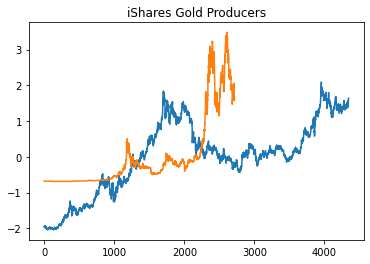

In [ ]:
pd.Series(normalized1.flatten()).plot(title="SPDR Gold Shares")
pd.Series(normalized2.flatten()).plot(title="iShares Gold Producers")

another example: https://www.analyticsvidhya.com/blog/2021/07/stock-prices-analysis-with-python/

In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
#!pip install yfinance
import yfinance as yf
%matplotlib inline

In [ ]:
start = "2014-01-01"
end = '2022-02-21'
nvo = yf.download('NVO',start,end)
infy = yf.download('MAERSK-B.CO',start,end)
wipro = yf.download('ORSTED.CO',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


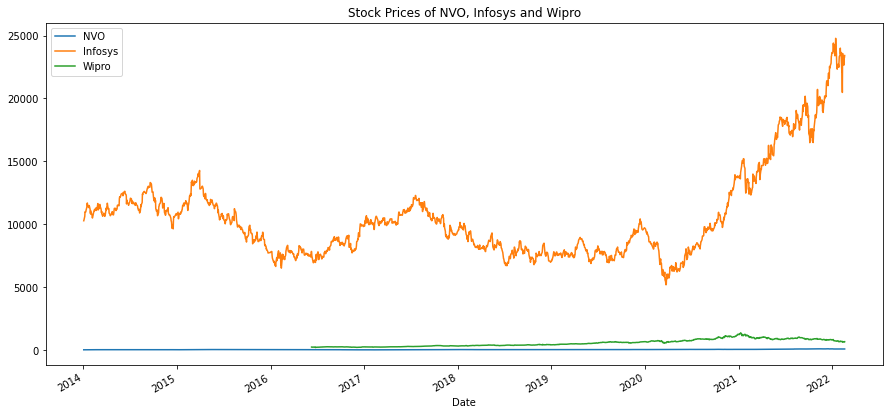

In [ ]:
nvo['Open'].plot(label = 'NVO', figsize = (15,7))
infy['Open'].plot(label = "Infosys")
wipro['Open'].plot(label = 'Wipro')
plt.title('Stock Prices of NVO, Infosys and Wipro')
plt.legend()

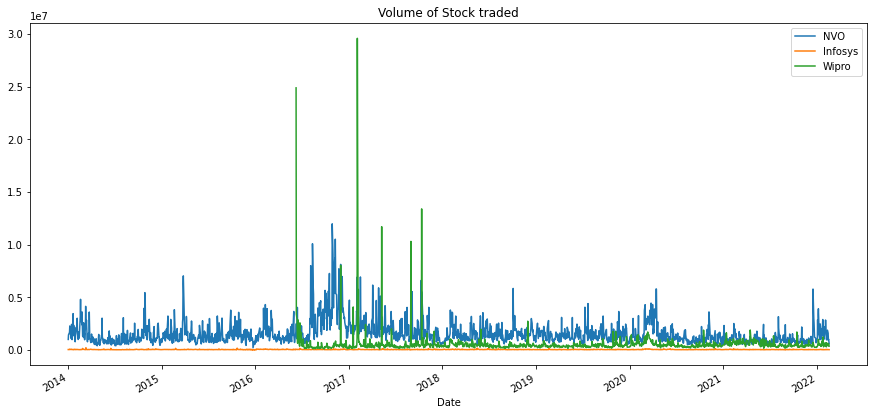

In [ ]:
nvo['Volume'].plot(label = 'NVO', figsize = (15,7))
infy['Volume'].plot(label = "Infosys")
wipro['Volume'].plot(label = 'Wipro')
plt.title('Volume of Stock traded')
plt.legend()

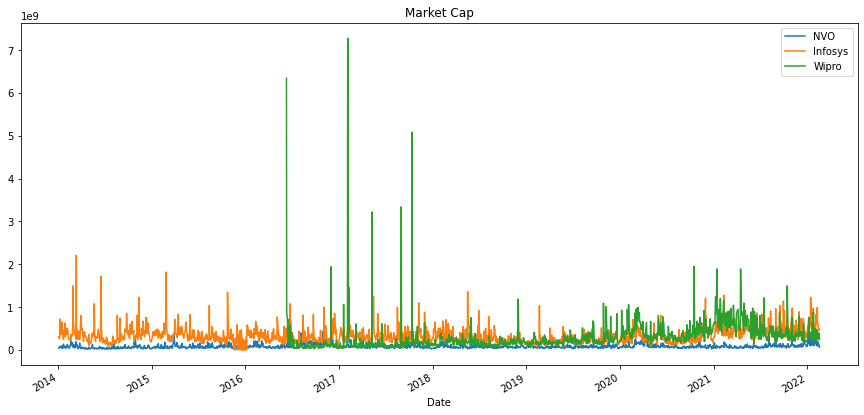

In [ ]:
#Market Capitalisation
nvo['MarktCap'] = nvo['Open'] * nvo['Volume']
infy['MarktCap'] = infy['Open'] * infy['Volume']
wipro['MarktCap'] = wipro['Open'] * wipro['Volume']
nvo['MarktCap'].plot(label = 'NVO', figsize = (15,7))
infy['MarktCap'].plot(label = 'Infosys')
wipro['MarktCap'].plot(label = 'Wipro')
plt.title('Market Cap')
plt.legend()

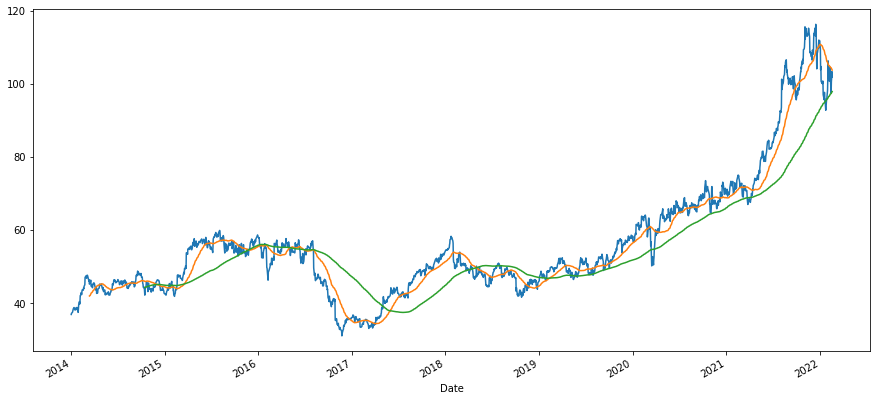

In [ ]:
nvo['MA50'] = nvo['Open'].rolling(50).mean()
nvo['MA200'] = nvo['Open'].rolling(200).mean()
nvo['Open'].plot(figsize = (15,7))
nvo['MA50'].plot()
nvo['MA200'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda347a5c90>,
      dtype=object)

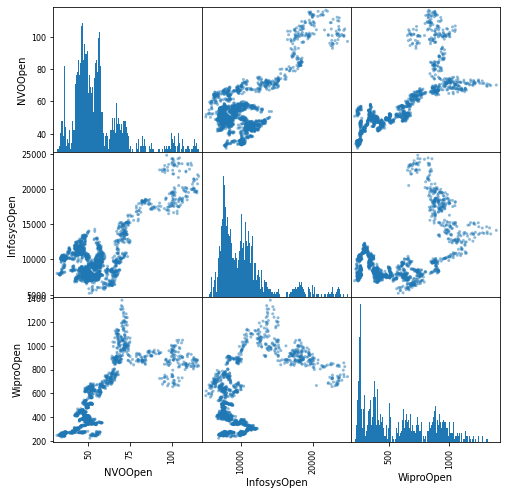

In [ ]:
data = pd.concat([nvo['Open'],infy['Open'],wipro['Open']],axis = 1)
data.columns = ['NVOOpen','InfosysOpen','WiproOpen']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})

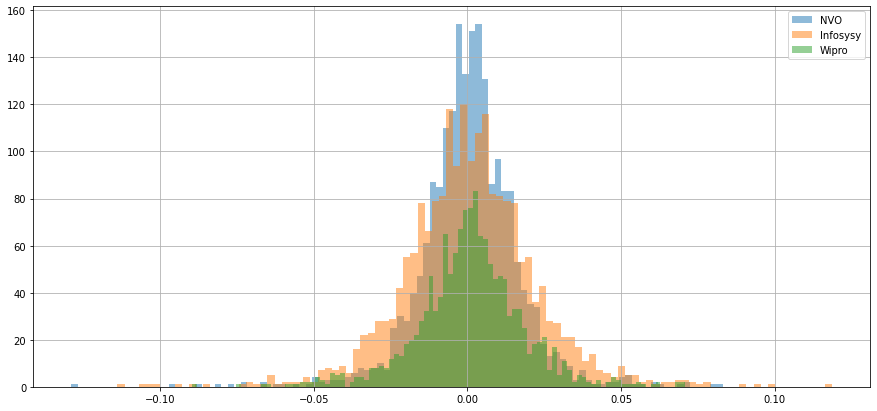

In [ ]:
#Volatility
nvo['returns'] = (nvo['Close']/nvo['Close'].shift(1)) -1
infy['returns'] = (infy['Close']/infy['Close'].shift(1))-1
wipro['returns'] = (wipro['Close']/wipro['Close'].shift(1)) - 1
nvo['returns'].hist(bins = 100, label = 'NVO', alpha = 0.5, figsize = (15,7))
infy['returns'].hist(bins = 100, label = 'Infosysy', alpha = 0.5)
wipro['returns'].hist(bins = 100, label = 'Wipro', alpha = 0.5)
plt.legend()

Getting a stocks financial info

In [2]:
# https://towardsdatascience.com/financial-data-from-yahoo-finance-with-python-b5399743bcc6
Amazon = yf.Ticker("AMZN")
print(Amazon.info)

{'zip': '98109-5210', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 1608000, 'longBusinessSummary': 'Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It sells merchandise and content purchased for resale from third-party sellers through physical and online stores. The company also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Rings, and Echo and other devices; provides Kindle Direct Publishing, an online service that allows independent authors and publishers to make their books available in the Kindle Store; and develops and produces media content. In addition, it offers programs that enable sellers to sell their products on its websites, as well as its stores; and programs that allow authors, musicians, filmmakers, Twitch streamers, skill and app developers, and oth

In [4]:
print(Amazon.info['beta']) 

1.126802


In [11]:
for i in Amazon.info:
  print("{}\t\t{}".format(i,Amazon.info[i]))

zip		98109-5210
sector		Consumer Cyclical
fullTimeEmployees		1608000
longBusinessSummary		Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It sells merchandise and content purchased for resale from third-party sellers through physical and online stores. The company also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Rings, and Echo and other devices; provides Kindle Direct Publishing, an online service that allows independent authors and publishers to make their books available in the Kindle Store; and develops and produces media content. In addition, it offers programs that enable sellers to sell their products on its websites, as well as its stores; and programs that allow authors, musicians, filmmakers, Twitch streamers, skill and app developers, and others to publish an